# BLACK FRIDAY PREDICTION                                                       
# Intern33                  

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase 
behaviour (specifically, purchase amount) against various products of different 
categories. They have shared purchase summary of various customers for selected high 
volume products from last month. The data set also contains customer demographics 
(age, gender, marital status, city_type, stay_in_current_city), product details 
(product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against 
various products which will help them to create personalized offer for customers against 
different products.
-  Data
-  Variable Definition
-  User_ID User ID
-  Product_ID Product ID
-  Gender Sex of User
-  Age Age in bins
-  Occupation Occupation (Masked)
-  City_Category Category of the City (A,B,C)
-  Stay_In_Current_City_Years Number of years stay in current city
-  Marital_Status Marital Status
-  Product_Category_1 Product Category (Masked)
-  Product_Category_2 Product may belongs to other category also (Masked)
-  Product_Category_3 Product may belongs to other category also (Masked)
-  Purchase Purchase Amount (Target Variable)

In [ ]:
#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#import the dataset
df=pd.read_csv("blackFriday_test.csv")
data=pd.read_csv("blackFriday_train.csv")

In [3]:
#let us see the data in train and test dataset
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
#occurance of duplicate rows based  on all columns
duplicate = df[df.duplicated()]

print(" Duplicate rows :")
#result
duplicate


 Duplicate rows :


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3


In [ ]:
#No duplicates data founf in the test dataset

In [5]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [6]:
#occurance of duplicate rows based  on all columns
duplicate = data[data.duplicated()]

print(" Duplicate rows :")
#result
duplicate

 Duplicate rows :


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [7]:
#There are no duplicate rows in both the dataset. Found no duplicate values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Among the columns in the dataset 
- Product_ID
- Gender
- Age
- City_Category
- Stay_In_Current_City_Years
Are Object DataType

Among the columns in the dataset
- Purchase
- Product_Category_3
- Product_Category_2
- Product_Category_1
- Marital_Status
- Occupation
- User_ID

Are continous data

We can see null values in the dataset in two colimns in train and test dataset

# Heatmap on Null values

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'User_ID'),
  Text(1.5, 0, 'Product_ID'),
  Text(2.5, 0, 'Gender'),
  Text(3.5, 0, 'Age'),
  Text(4.5, 0, 'Occupation'),
  Text(5.5, 0, 'City_Category'),
  Text(6.5, 0, 'Stay_In_Current_City_Years'),
  Text(7.5, 0, 'Marital_Status'),
  Text(8.5, 0, 'Product_Category_1'),
  Text(9.5, 0, 'Product_Category_2'),
  Text(10.5, 0, 'Product_Category_3')])

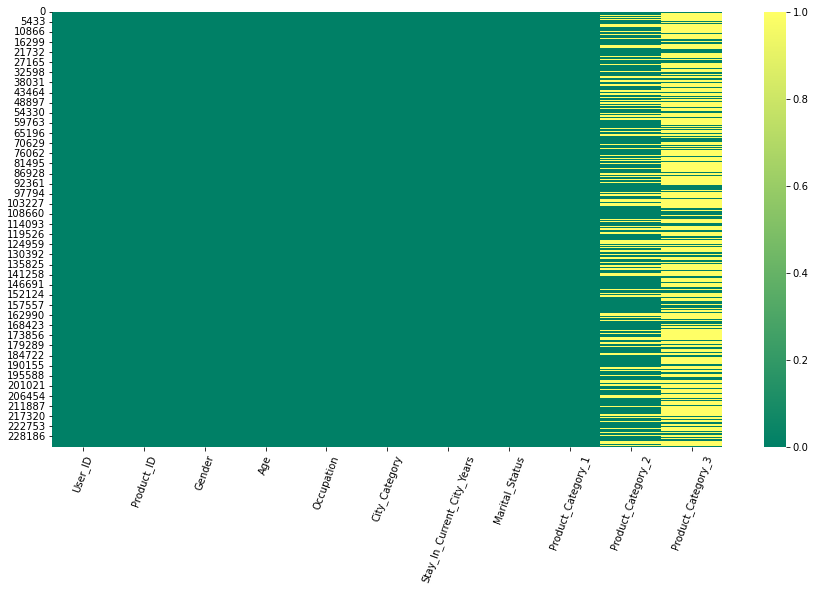

In [10]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.isnull(), cmap = 'summer');
plt.xticks(rotation = '70')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'User_ID'),
  Text(1.5, 0, 'Product_ID'),
  Text(2.5, 0, 'Gender'),
  Text(3.5, 0, 'Age'),
  Text(4.5, 0, 'Occupation'),
  Text(5.5, 0, 'City_Category'),
  Text(6.5, 0, 'Stay_In_Current_City_Years'),
  Text(7.5, 0, 'Marital_Status'),
  Text(8.5, 0, 'Product_Category_1'),
  Text(9.5, 0, 'Product_Category_2'),
  Text(10.5, 0, 'Product_Category_3'),
  Text(11.5, 0, 'Purchase')])

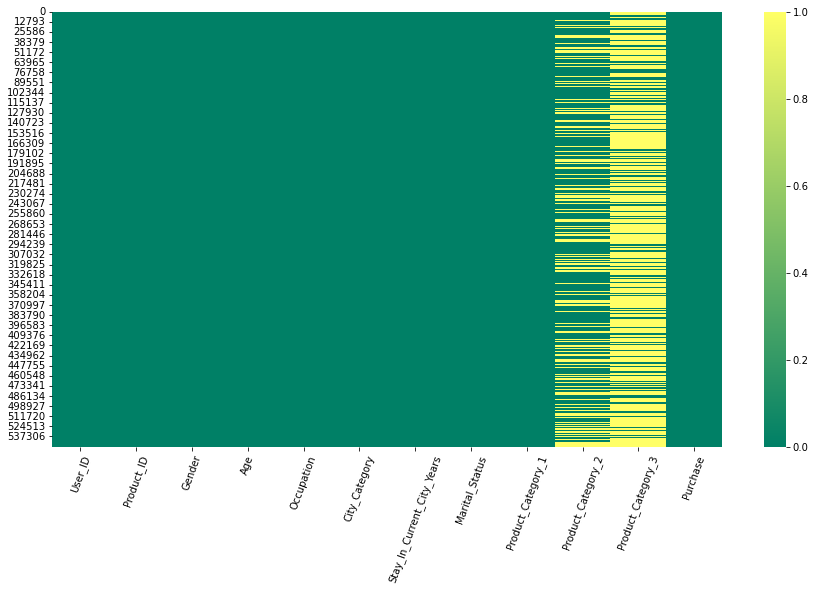

In [11]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.isnull(), cmap = 'summer');
plt.xticks(rotation = '70')

In [12]:
df.isnull().sum()[df.isnull().sum() != 0] / df.shape[0] * 100

Product_Category_2    30.969311
Product_Category_3    69.590195
dtype: float64

In [13]:
data.isnull().sum()[data.isnull().sum() != 0] / data.shape[0] * 100

Product_Category_2    31.566643
Product_Category_3    69.672659
dtype: float64

the null value in the Product_Category_3 is around 70% in both train and test so we can drop the column and 
the null values in the Product_Category_2 has to be processed in the dataset

In [14]:
# dropping Product_Category_3 column
df.drop('Product_Category_3',axis=1,inplace=True)
data.drop('Product_Category_3',axis=1,inplace=True)

# Filling  Missing Values

In [15]:
#train dataset

data['Product_Category_2'] = data['Product_Category_2'].fillna(np.mean(data['Product_Category_2']))

In [16]:
#test dataset

df['Product_Category_2'] = df['Product_Category_2'].fillna(np.mean(df['Product_Category_2']))

In [17]:
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

In [18]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [ ]:
#null values have been treated 

# EDA Process

In [19]:
for column in df.columns:
    print(df[column].nunique(), " \t: ",column)

5891  	:  User_ID
3491  	:  Product_ID
2  	:  Gender
7  	:  Age
21  	:  Occupation
3  	:  City_Category
5  	:  Stay_In_Current_City_Years
2  	:  Marital_Status
18  	:  Product_Category_1
18  	:  Product_Category_2


In [20]:
for column in data.columns:
    print(data[column].nunique(), " \t: ",column)

5891  	:  User_ID
3631  	:  Product_ID
2  	:  Gender
7  	:  Age
21  	:  Occupation
3  	:  City_Category
5  	:  Stay_In_Current_City_Years
2  	:  Marital_Status
20  	:  Product_Category_1
18  	:  Product_Category_2
18105  	:  Purchase


In [ ]:
#these are the count of unique values present in the dataset 

In [21]:
temp=pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']) ,len(df[df['Gender']=='F'])]}, index = ['Male', 'Female'])
temp


,Ratio
Male,175772
Female,57827


In [ ]:
#there are 175772 male person in the dataset and 57827 Female in the test dataset 

<AxesSubplot:ylabel='Ratio'>

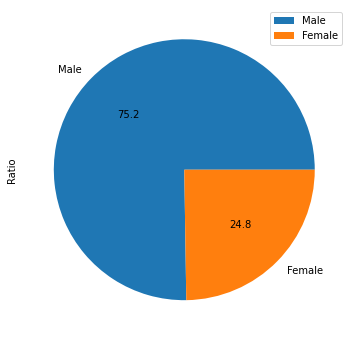

In [22]:
temp.plot.pie(y='Ratio' ,figsize =(6,6), autopct = "%.1f")

In [ ]:
# 75% of the data contains male nad almost 25% are female

In [23]:
temp=pd.DataFrame({'Ratio' : [len(data[data['Gender']=='M']) ,len(data[data['Gender']=='F'])]}, index = ['Male', 'Female'])
temp

,Ratio
Male,414259
Female,135809


In [ ]:
#there are 414259 male person in the dataset and 135809 Female in the train dataset 

<AxesSubplot:ylabel='Ratio'>

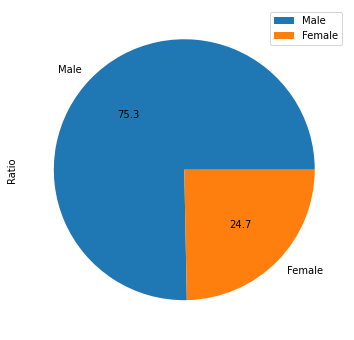

In [24]:
temp.plot.pie(y='Ratio' ,figsize =(6,6), autopct = "%.1f")

In [ ]:
# 75% of the data contains male nad almost 25% are female in train dataset

In [25]:
df.groupby('Age').size()

Age
0-17      6232
18-25    42293
26-35    93428
36-45    46711
46-50    19577
51-55    16283
55+       9075
dtype: int64

<AxesSubplot:title={'center':'Purchase Distribution by age'}, xlabel='Age'>

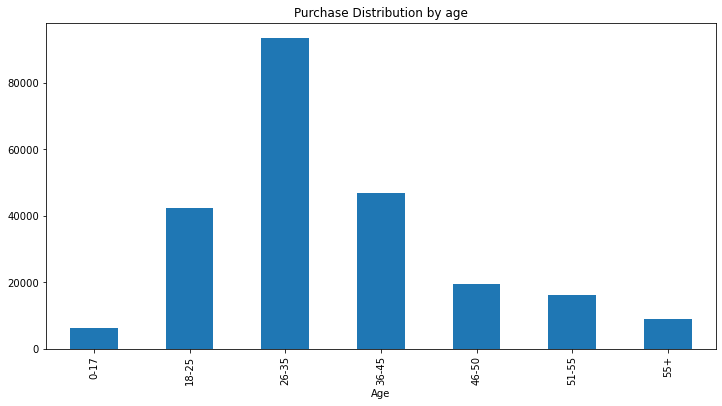

In [26]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,6),title='Purchase Distribution by age')

In [ ]:
#We can see that in the 0-17 age group there are 6232 count
#We can see that in the 18-25 age group there are 42293 count
#We can see that in the 26-35 age group there are 93428 count
#We can see that in the 36-45 age group there are 46711 count
#We can see that in the 46-50  age group there are 19577 count
#We can see that in the 51-55  age group there are 16283 count
#We can see that in the 55+ age group there are 9075 count

#So max data is in 18-25 age group and least in 0-17 age group


<AxesSubplot:ylabel='Product_ID'>

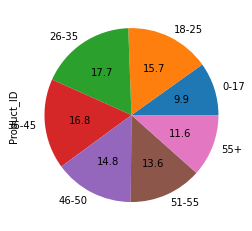

In [27]:
df.groupby('Age')['Product_ID'].nunique().plot(kind='pie',autopct='%.1f')

In [28]:
data.groupby('Age').size()

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
dtype: int64

In [ ]:
    #We can see that in the 0-17 age group there are 15102 count
    #We can see that in the 18-25 age group there are 99660 count
    #We can see that in the 26-35 age group there are 219587 count
    #We can see that in the 36-45 age group there are 110013 count
    #We can see that in the 46-50  age group there are 45701 count
    #We can see that in the 51-55  age group there are 38501 count
    #We can see that in the 55+ age group there are 21504 count

    #So max data is in 18-25 age group and least in 0-17 age group in train tataset


<AxesSubplot:title={'center':'Purchase Distribution by age'}, xlabel='Age'>

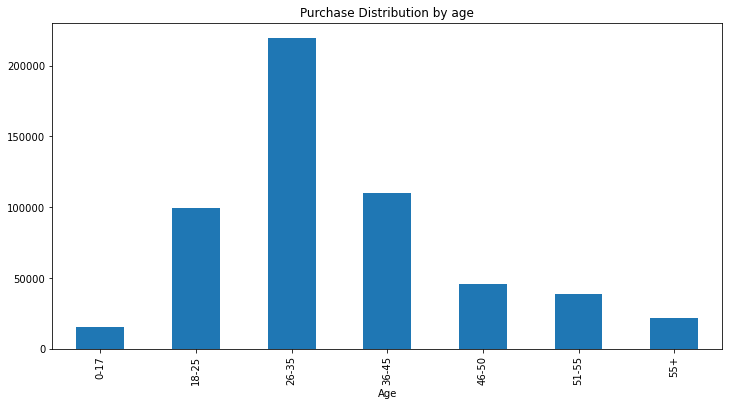

In [29]:
data.groupby('Age').size().plot(kind='bar',figsize=(12,6),title='Purchase Distribution by age')

In [ ]:
#So max data is in 18-25 age group and least in 0-17 age group in train tataset

In [30]:
for i in df['Age'].unique():
    print(i," : ",df[df['Age']==i]['Product_ID'].nunique())

46-50  :  2695
26-35  :  3229
36-45  :  3056
18-25  :  2865
51-55  :  2472
55+  :  2110
0-17  :  1799


- We can see that in the age group 26-35 has the highest unique product id in the testdataset

- the age group 0-17 has the least unique product id in the testdataset


In [31]:
for i in data['Age'].unique():
    print(i," : ",data[data['Age']==i]['Product_ID'].nunique())

0-17  :  2323
55+  :  2584
26-35  :  3427
46-50  :  3106
51-55  :  2887
36-45  :  3328
18-25  :  3220


- We can see that in the age group 26-35 has the highest unique product id in the traindataset

- the age group 0-17 has the least unique product id in the traindataset


In [32]:
import warnings
  
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Gender', ylabel='count'>

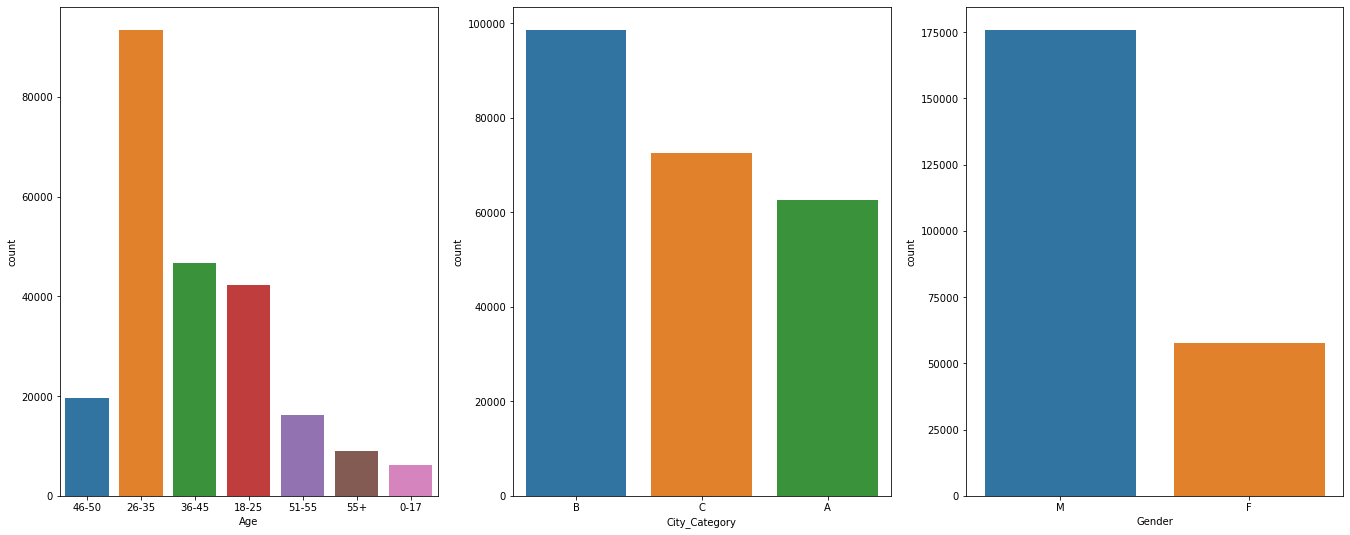

In [33]:

plt.figure(figsize = (23, 9))

plt.subplot2grid((1, 3), (0, 0))
sns.countplot(df['Age'])

plt.subplot2grid((1, 3), (0, 1))
sns.countplot(df['City_Category'])

plt.subplot2grid((1, 3), (0, 2))
sns.countplot(df['Gender'])

- the Highest data is in 26-35 in the testdataset
- the least data is in 26-35 in the testdataset

- Among the city category B has the highest count and 
- Least count in city category A

- The male Count is the highest in dataset

<AxesSubplot:xlabel='Gender', ylabel='count'>

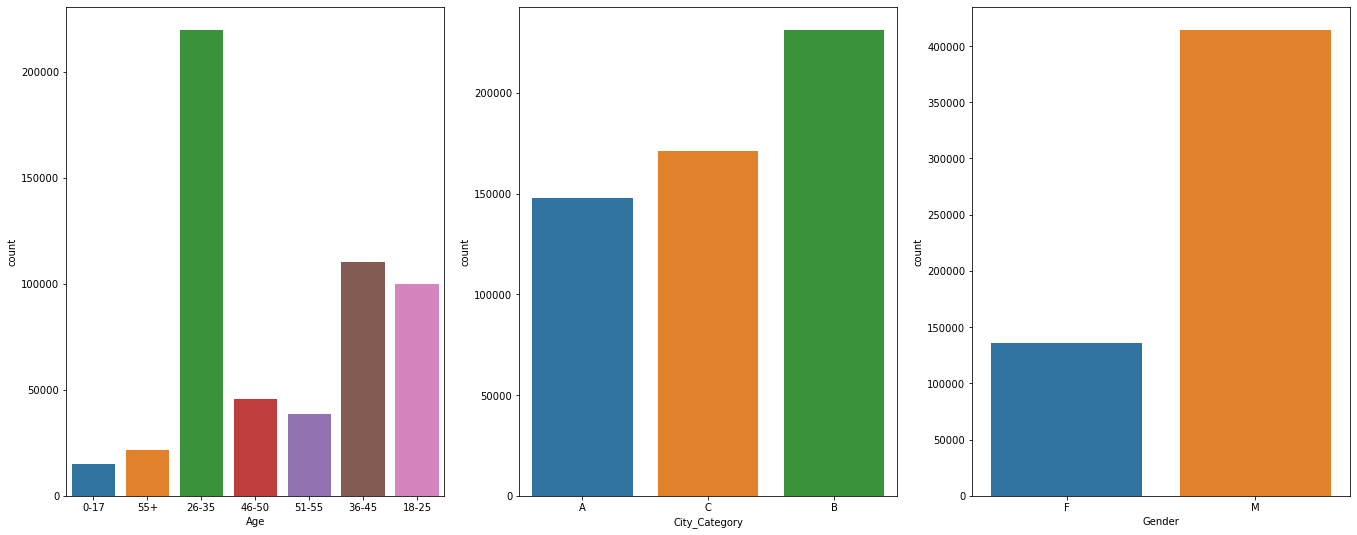

In [34]:

plt.figure(figsize = (23, 9))
plt.title("Null Values")

plt.subplot2grid((1, 3), (0, 0))
sns.countplot(data['Age'])

plt.subplot2grid((1, 3), (0, 1))
sns.countplot(data['City_Category'])

plt.subplot2grid((1, 3), (0, 2))
sns.countplot(data['Gender'])

- the Highest data is in 26-35 in the traindataset
- the least data is in 26-35 in the traindataset

- Among the city category B has the highest count and 
- Least count in city category A

- The male Count is the highest in dataset

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

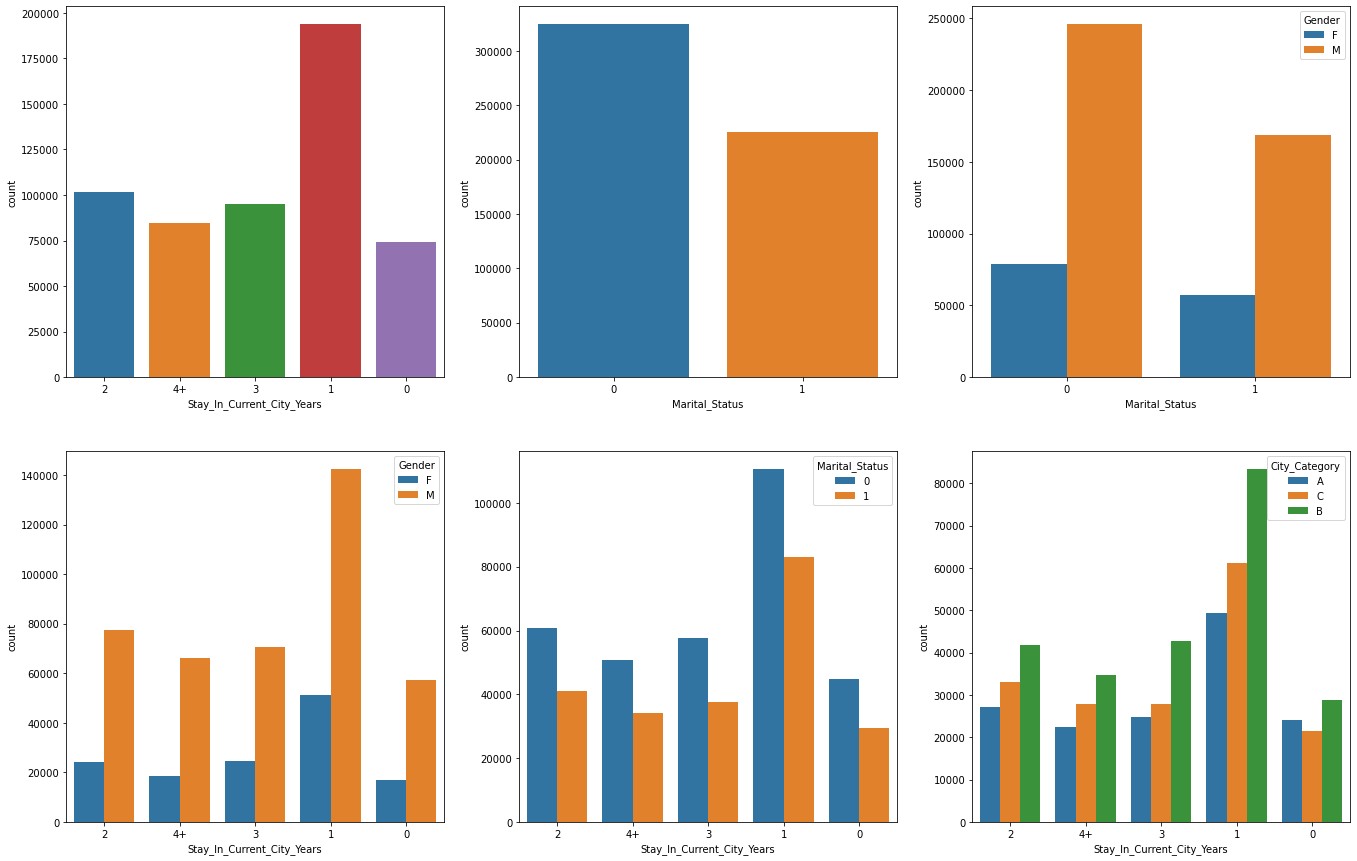

In [36]:

plt.figure(figsize = (23, 15))

plt.subplot2grid((2, 3), (0, 0))
sns.countplot(data['Stay_In_Current_City_Years'])

plt.subplot2grid((2, 3), (0, 1))
sns.countplot(data['Marital_Status'])

plt.subplot2grid((2, 3), (0, 2))
sns.countplot(data['Marital_Status'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 0))
sns.countplot(data['Stay_In_Current_City_Years'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 1))
sns.countplot(data['Stay_In_Current_City_Years'], hue = data['Marital_Status'])

plt.subplot2grid((2, 3), (1, 2))
sns.countplot(data['Stay_In_Current_City_Years'], hue = data['City_Category'])

- We can see Stay_In_Current_City_Years has the highest count in 1 year the train dataset
- and Stay_In_Current_City_Years is  least count in less than 1 year  the train dataset

- We can see the data with married people less in the dataset  
- Among the datastet males are dominating in the married and nonmarried people in the dataset
- We can see least dataAmnong the females with in married people

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

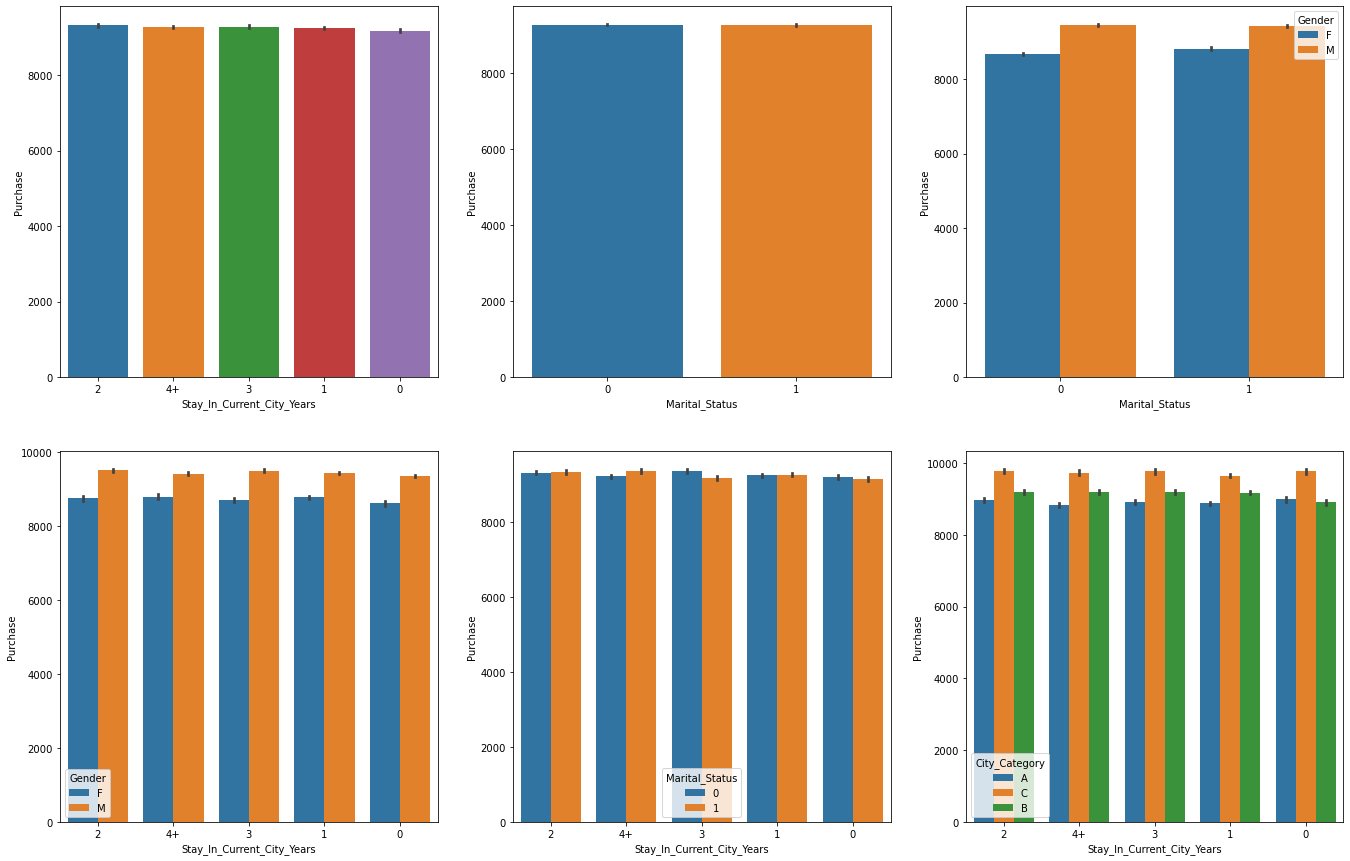

In [37]:

plt.figure(figsize = (23, 15))

plt.subplot2grid((2, 3), (0, 0))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'])

plt.subplot2grid((2, 3), (0, 1))
sns.barplot(data['Marital_Status'], data['Purchase'])

plt.subplot2grid((2, 3), (0, 2))
sns.barplot(data['Marital_Status'], data['Purchase'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 0))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 1))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'], hue = data['Marital_Status'])

plt.subplot2grid((2, 3), (1, 2))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'], hue = data['City_Category'])

- We can see Stay_In_Current_City_Years has almost equal no of purchase count in the train dataset
- and Stay_In_Current_City_Years has the highest count for males in the train dataset
- Comparing the data difference of  percentage of males and female is small among teh dataset

- We can see the data with married people having  almost equal no of purchase count in the train dataset
- Among the datastet males are dominating in the married and nonmarried people in the dataset in Purchase counts
- We can see least dataAmnong the females with in married people with  Purchase counts

In [104]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2'],
      dtype='object')

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

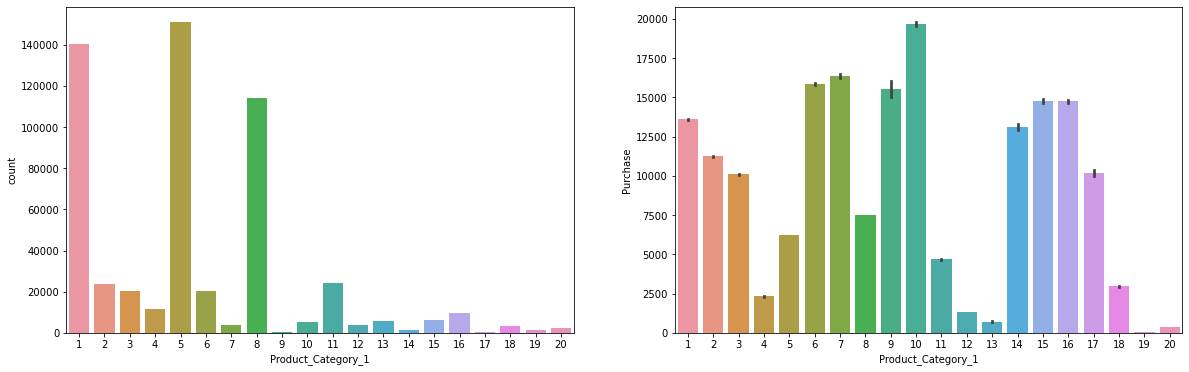

In [38]:
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(data['Product_Category_1'])

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(data['Product_Category_1'], data['Purchase'])

- In Product_Category_1 Category 5 has the highest count and least in  Category 9 and 17.
- The second highest is in Category 1 in the train dataset
- the categories 1,5,8 has predominence in the train dataset

- The purchase count is highest for the category for 10 and 
- least in categories 4 and 12,13,19,20 in the dataset

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

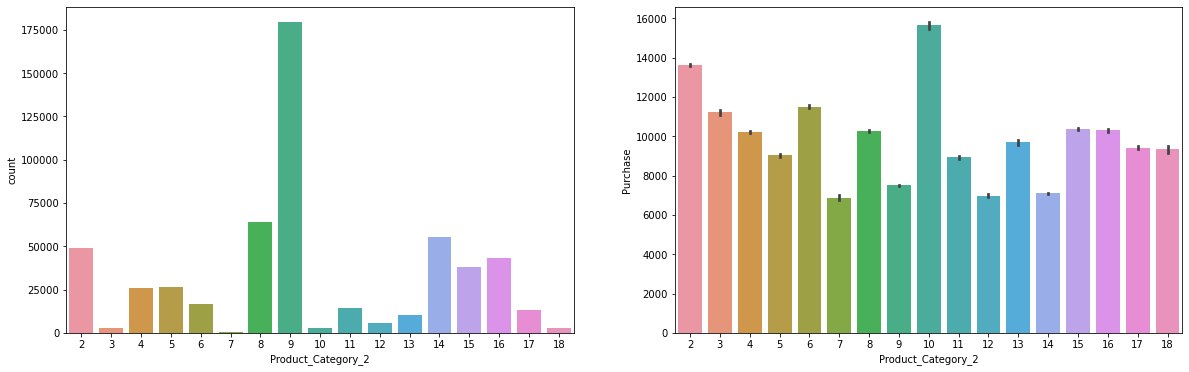

In [39]:
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(data['Product_Category_2'].astype('int'))

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(data['Product_Category_2'].astype('int'), data['Purchase'])


- In Product_Category_2 Category 9 has the highest count and least in  Category 7.
- The second highest is in Category 8 and 14 in the train dataset
- the categories 9,8,2,14,15,16 has predominence in the train dataset



- The purchase count is highest for the category for 10 and 
- least in categories 7,12,14 in the dataset

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

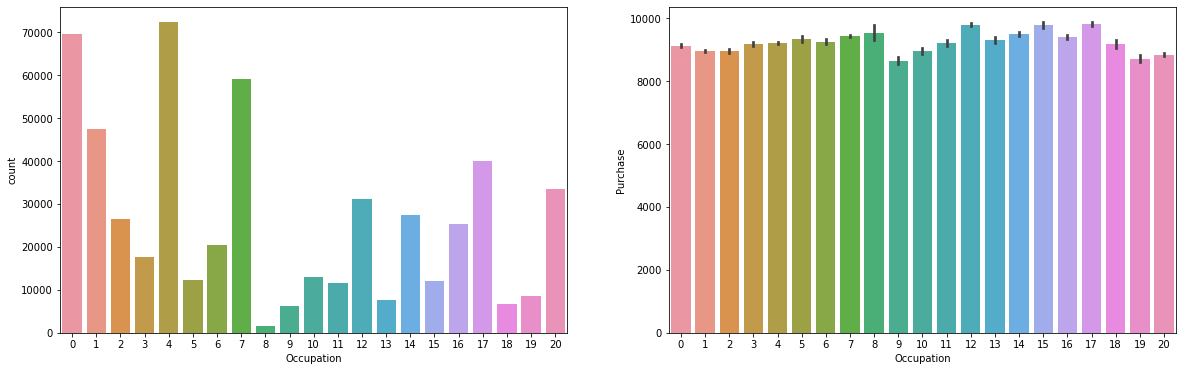

In [40]:
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(data['Occupation'])

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(data['Occupation'], data['Purchase'])
     

- In Occupation Category 4,0,7 have the highest counts and least in  Category 8.
- The second highest is in Category 8 and 14 in the train dataset
- the categories 9,8,2,14,15,16 has predominence in the train dataset

- The purchase count have the highest counts for 12,15,17 Category and 
- least in categories 9,19 in the dataset

In [41]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

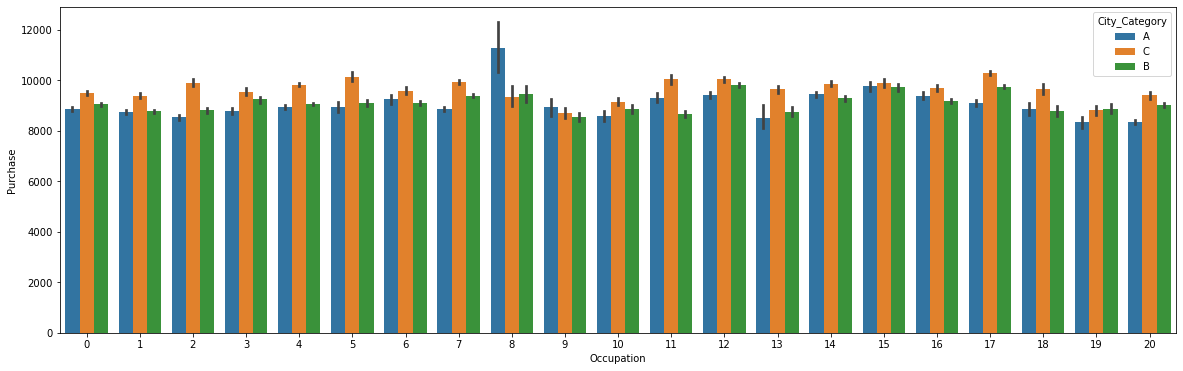

In [43]:
plt.figure(figsize = (20, 6))
sns.barplot('Occupation', 'Purchase', hue = 'City_Category', data = data)

- Among the Occupation categories we can see that except in category 8 all the occupation categories are having highest in City category of C in terms of purchase counts
- In almost all the occupation categories the City category A is least purchase counts

<AxesSubplot:xlabel='Occupation', ylabel='count'>

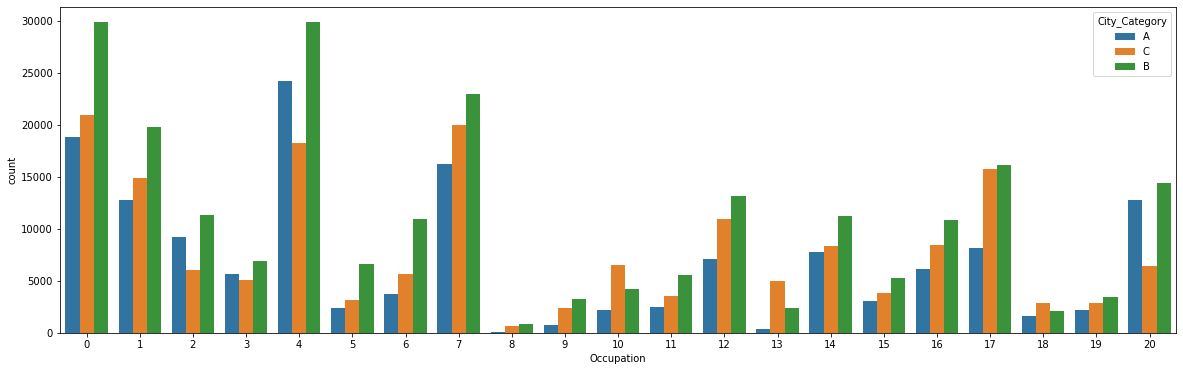

In [44]:
plt.figure(figsize = (20, 6))
sns.countplot('Occupation', hue = 'City_Category', data = data)

- Among the Occupation categories 0 ,4 7 has the highest percentage of data in the three city categories
- In almost all the occupation categories 8 8,18,19 are tyhe least counts with least data in the City category A  

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

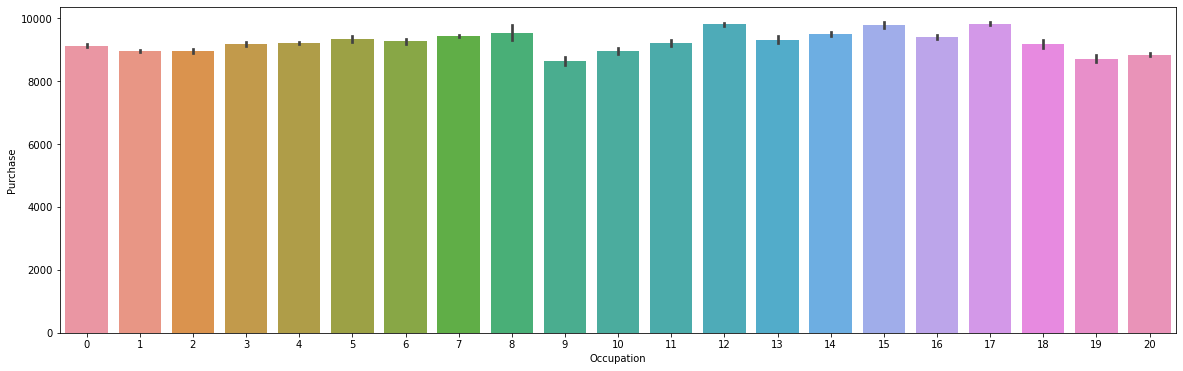

In [45]:

plt.figure(figsize = (20, 6))
sns.barplot('Occupation', 'Purchase', data = data)
     

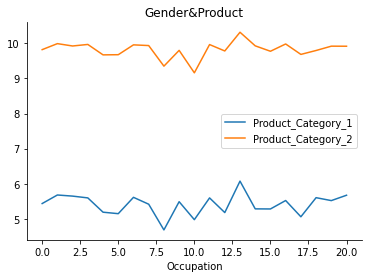

In [47]:
data.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2"]].plot.line(title="Gender&Product")
sns.despine()

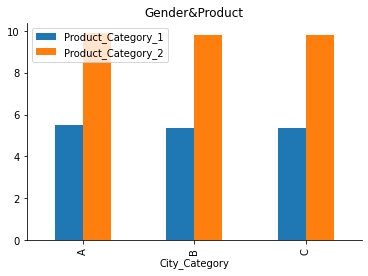

In [48]:
data.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2"]].plot.bar(title="Gender&Product")
sns.despine()
#Products under category 2 are our most popular items, and this is true for all kinds of customers coming from different backgrounds

- In city category we can see trend in Product_Category_2 in all city category and least in  Product_Category_1

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [50]:
data.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.000000,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.000000,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.000000,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,9.842329,7871


In [51]:
# Now checking for numerical columns in test dataset
numerical_columns=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Purchase']


In [52]:
numerical_columns.pop()

'Purchase'

In [53]:
numerical_columns

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2']

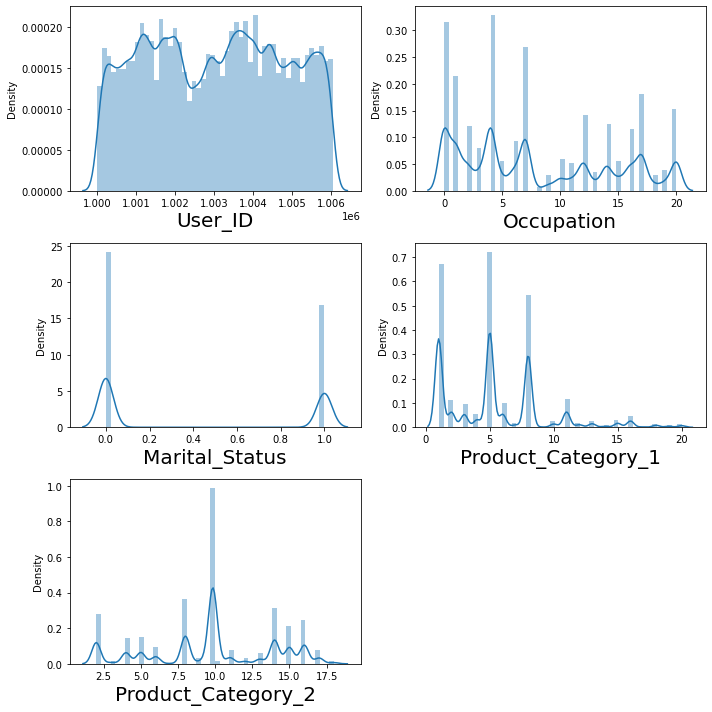

In [54]:
#Distribution plot for all numerical columns
plt.figure(figsize = (10,10))
plotnumber = 1
for column in data[numerical_columns]:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

- we can see skewness in Occupation,Product_categories1 and Product_categories2
- we can ignore the skewness as it is Categorical data type
- Uniform datatype in userId    in dataset

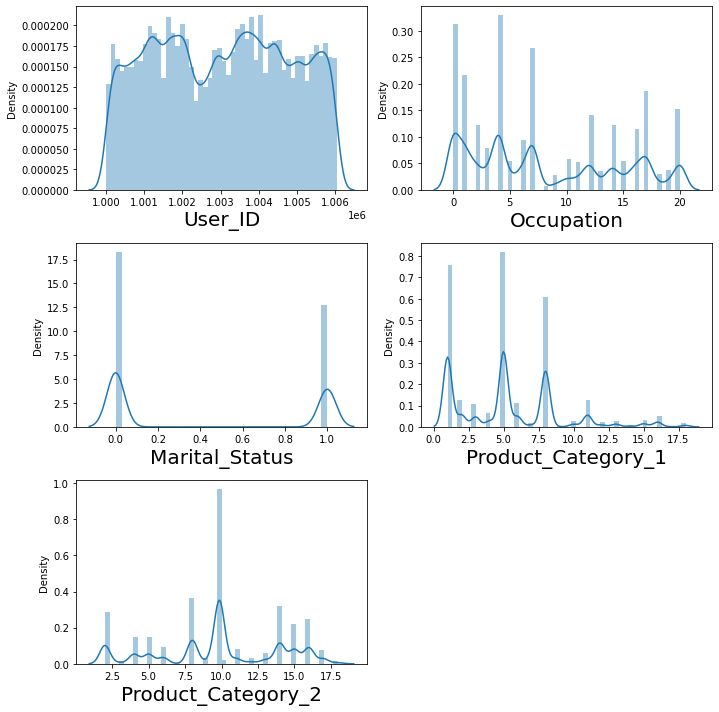

In [55]:
#Distribution plot for all numerical columns
plt.figure(figsize = (10,10))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

- we can see skewness in Occupation,Product_categories1 and Product_categories2
- we can ignore the skewness as it is Categorical data type
- Uniform datatype in userId     in test dataset

In [56]:
train_data=data

In [57]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969


# Checking for outliers:

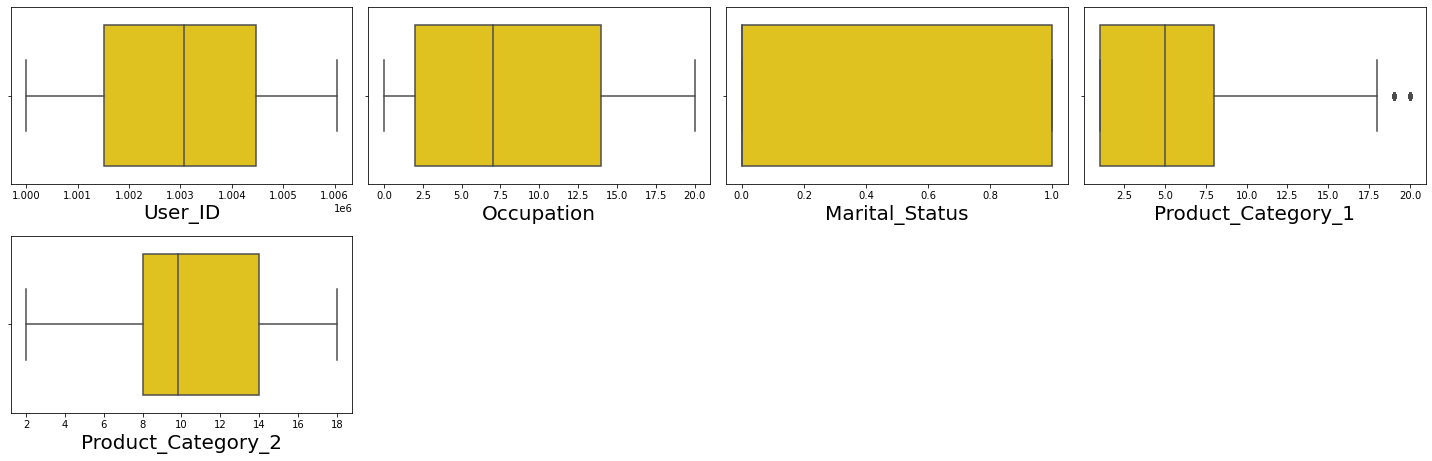

In [58]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- We can see some outier in Product category 1 in the dataset

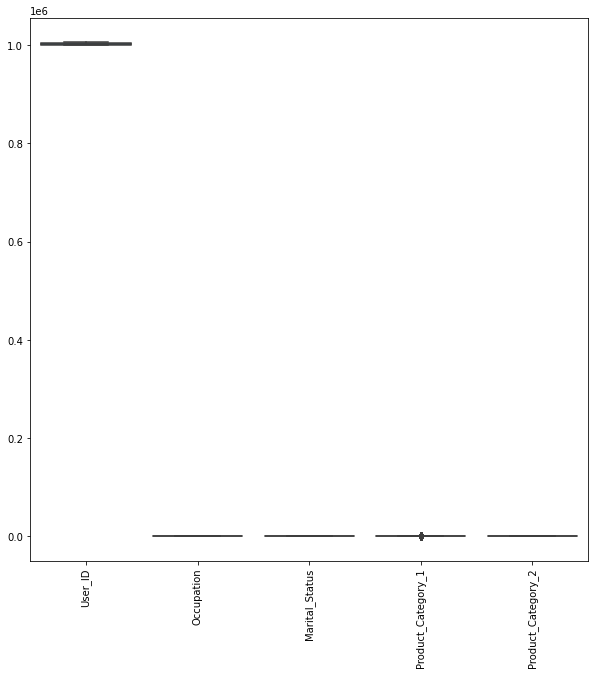

In [59]:
#we need to check for outliers only on non categorical data
#train data

sns.boxplot(data=data[['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']])
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,10)

- We can see some outier in Product category 1 in the dataset

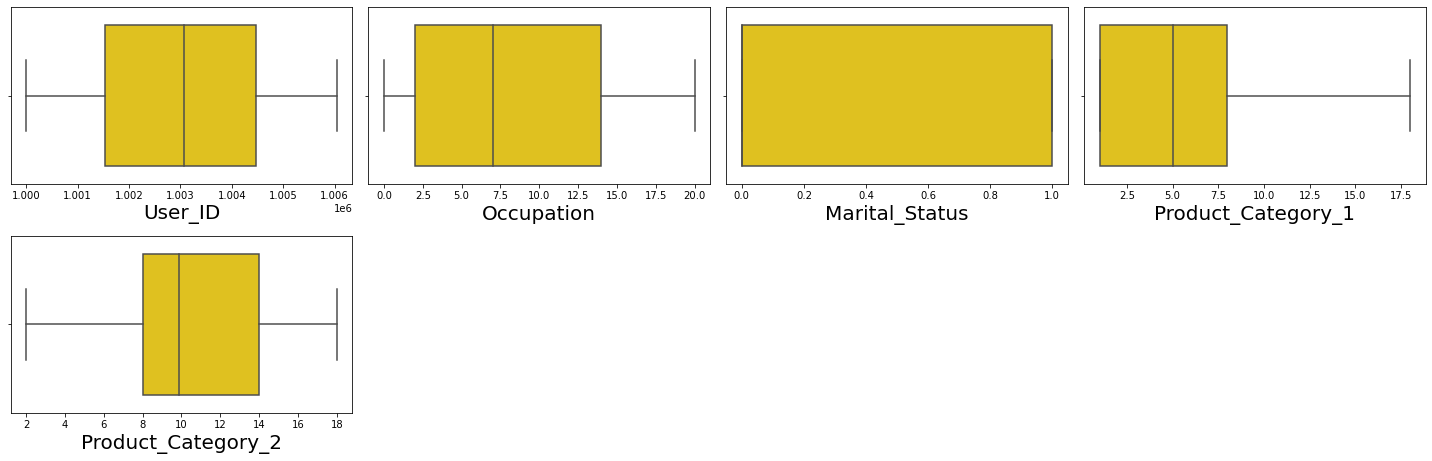

In [60]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Outliers are not visible in the test dataset

# Removing Outliers in train dataset:

# i) Zscore method:

In [61]:
#Features having outliers in train dataset
features=data[['Product_Category_2']]

In [ ]:
#Above are the list of columns with outliers in train dataset.

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(features))
data_new=data[(z<3).all(axis=1)]
data=data_new
data_new.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,672.0,0.0,0.0,10,0.0,2,0,3,9.842329,8370
1,1000001,2376.0,0.0,0.0,10,0.0,2,0,1,6.000000,15200
2,1000001,852.0,0.0,0.0,10,0.0,2,0,12,9.842329,1422
3,1000001,828.0,0.0,0.0,10,0.0,2,0,12,14.000000,1057
4,1000002,2734.0,1.0,6.0,16,2.0,4+,0,8,9.842329,7969


# Encoding the Categorical data 

In [79]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [ ]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

# Checking for skewness:

In [ ]:
#Separating features and label in train dataset:¶

In [90]:
x = data.drop("Purchase",axis=1)
y = data["Purchase"]

In [91]:
#Checking for skewness of train dataset
x.skew()

User_ID                       0.003066
Product_ID                    0.153679
Gender                       -1.173946
Age                           0.808156
Occupation                    0.400140
City_Category                -0.071392
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category_1            1.025735
Product_Category_2           -0.196747
dtype: float64

In [93]:
#Creating a list of skewed features in train dataset
fea=['Age','Product_Category_1']

In [94]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
x[fea] = scaler.fit_transform(x[fea].values)

In [95]:
#Checking skewness again in train dataset
x[fea].skew()

Age                   0.007590
Product_Category_1   -0.044765
dtype: float64

In [ ]:
#skewness Got removed  

# Checking correlation using heat map

In [96]:
#Correlation of test dataset
cor=data.corr()


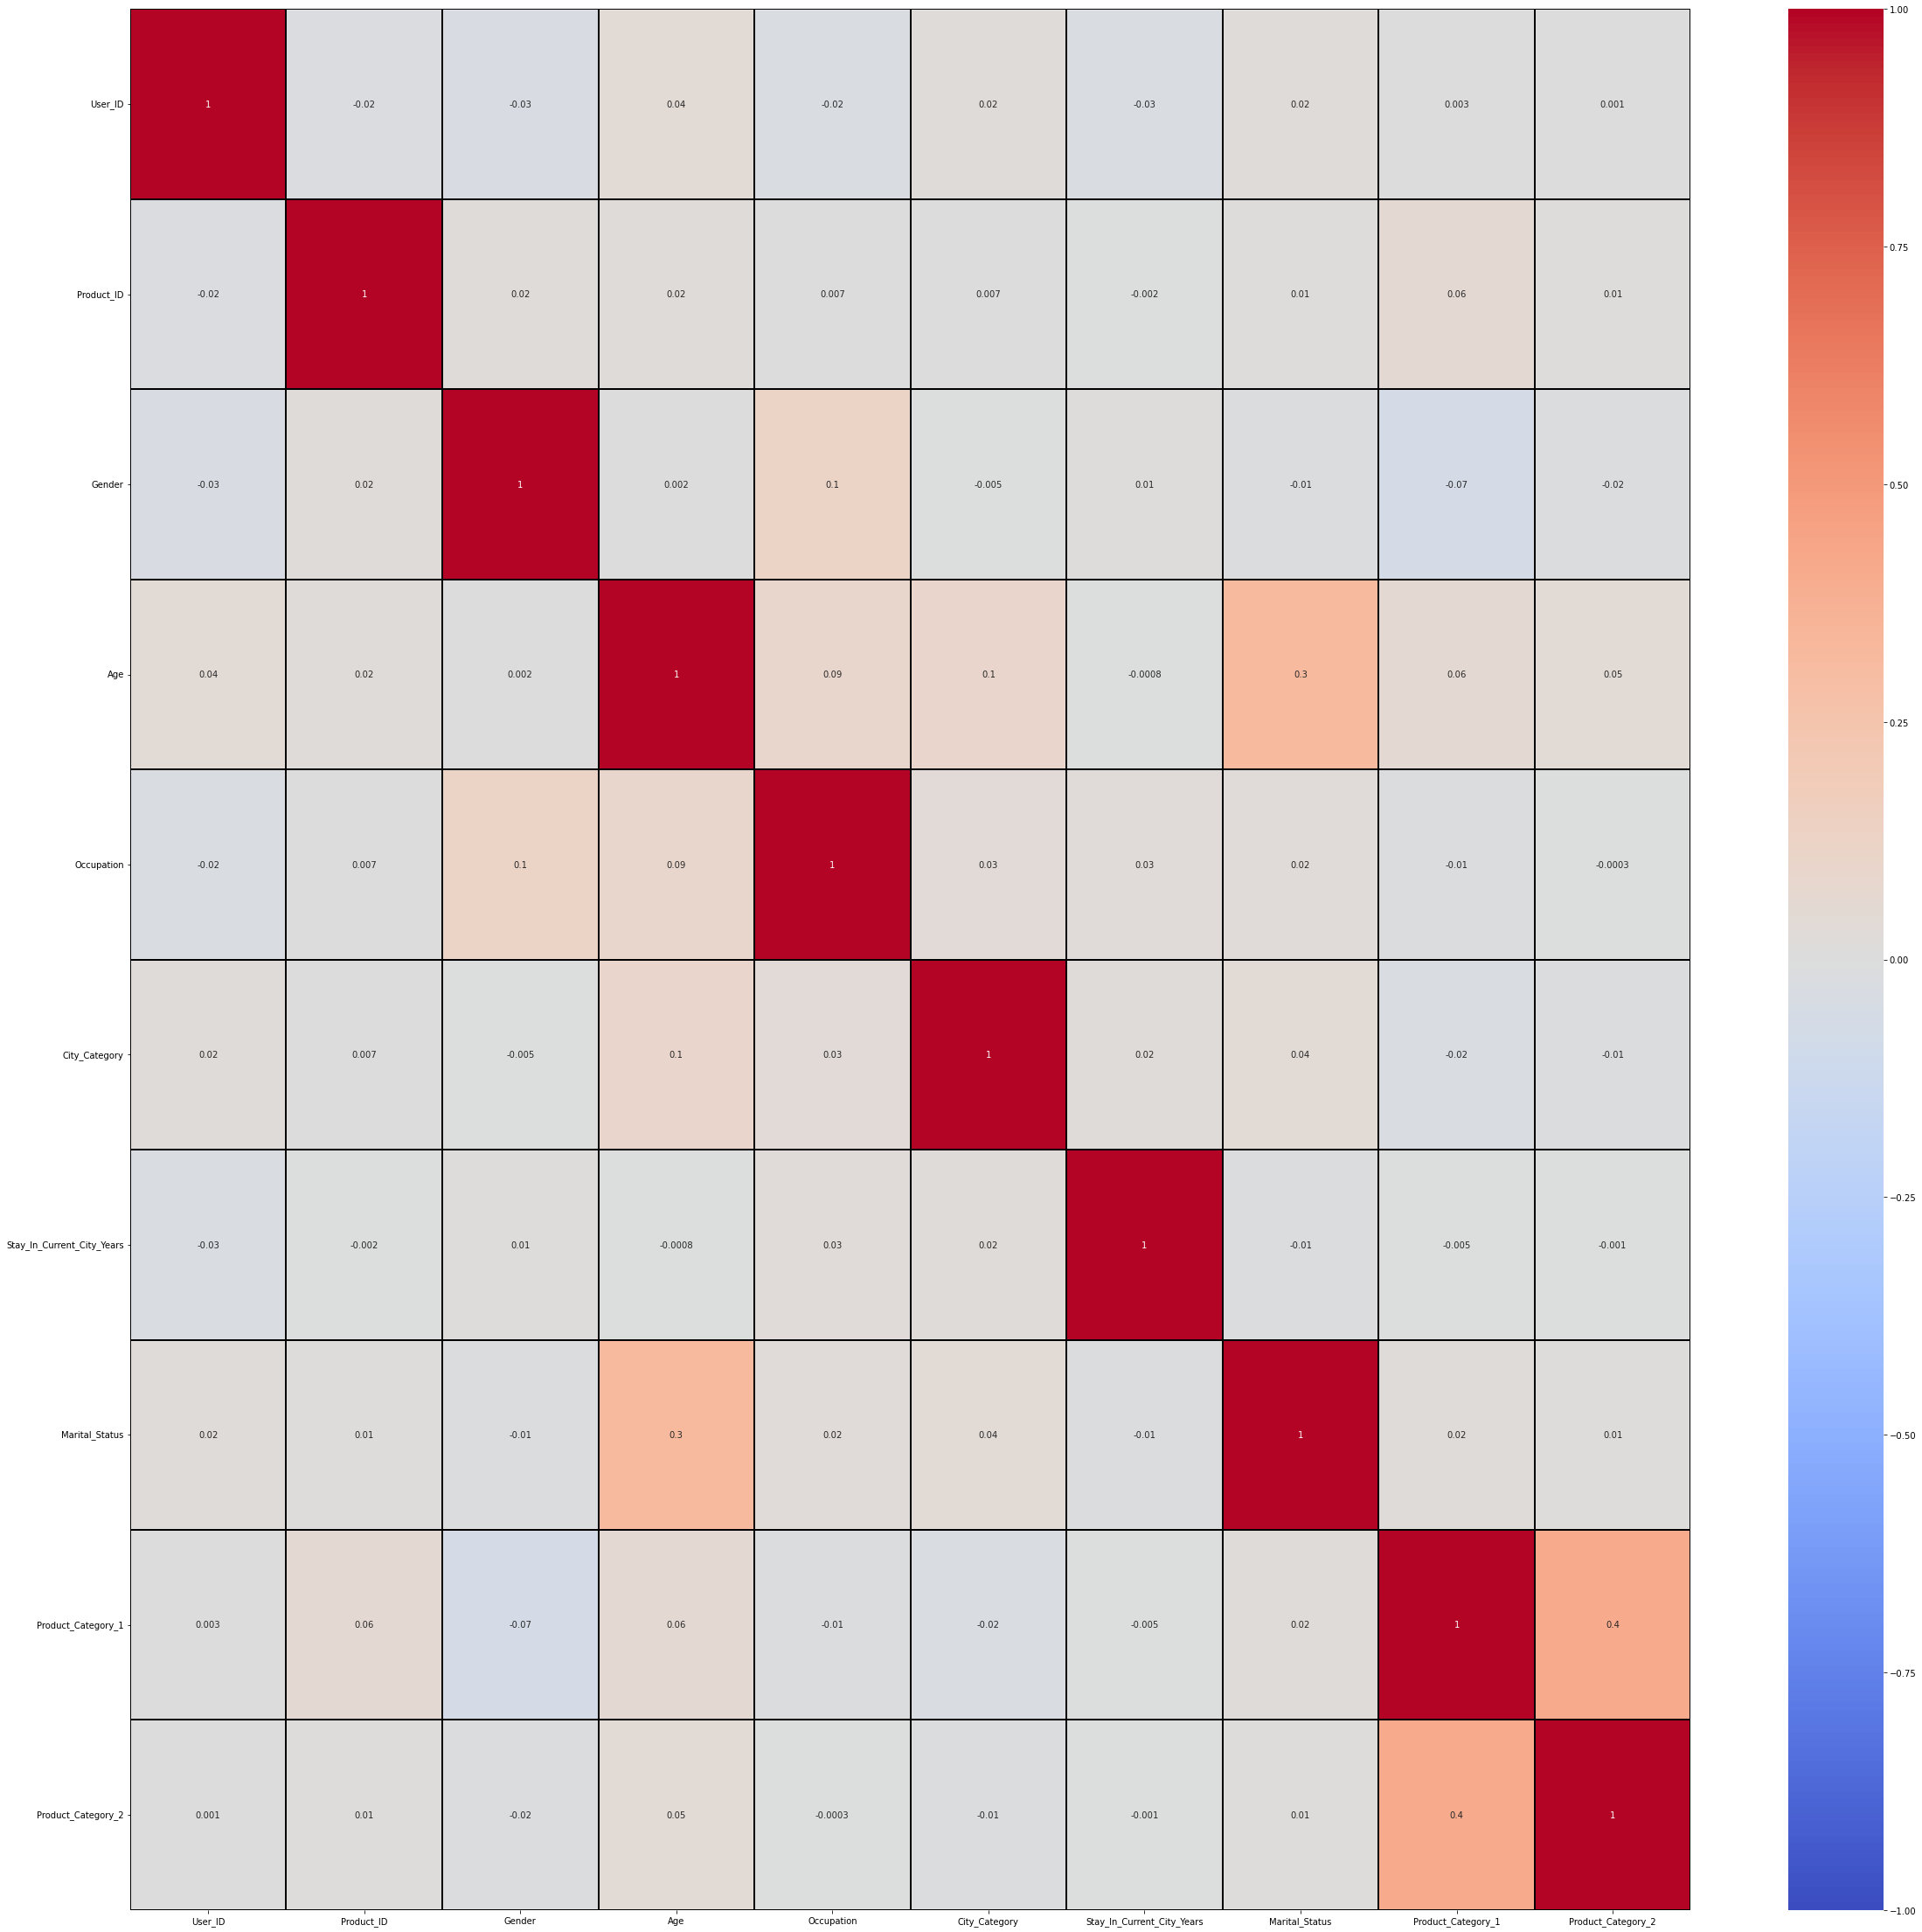

In [97]:
# Visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(x.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

# Scaling the train data using standard scaler:

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()



vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif.sort_values('vif_Features')

,vif_Features,Features
6,1.002505,Stay_In_Current_City_Years
1,1.004725,Product_ID
0,1.005194,User_ID
5,1.012193,City_Category
2,1.020348,Gender
4,1.024402,Occupation
7,1.113365,Marital_Status
3,1.136018,Age
9,1.200805,Product_Category_2
8,1.212307,Product_Category_1


In [101]:
#No multicolinearity issue  in  dataset.